#Purely vertical rocket flight 

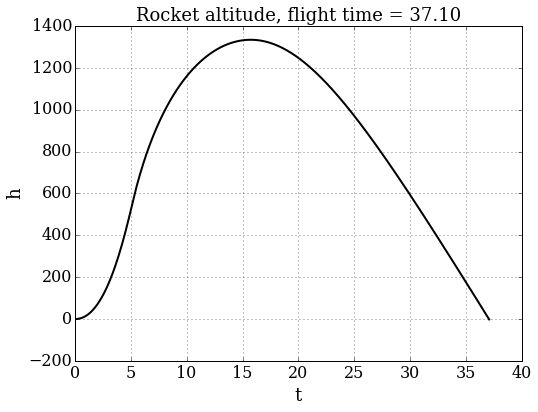

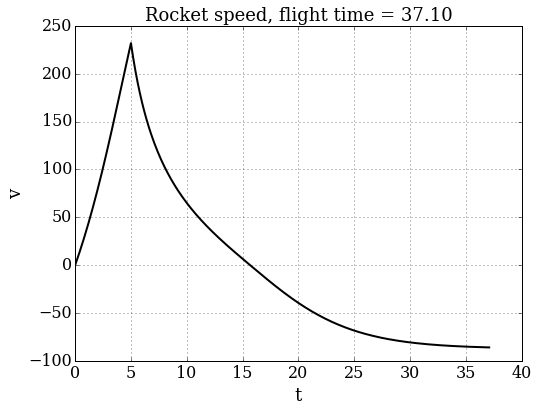

In [46]:

from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# model parameters:
g = 9.81       # gravity in m*s^{-2}
v_e = 325.0    # exhaust velocity in  m/s 
C_D = 0.15    # drag coefficient, dimesionless 
m_s = 50.      # the weight of the rocket shell in kg
r = 0.5        # radius of the rocket body in m
A = numpy.pi*r**2 # maximum cross sectional area of the rocket in m^2
rho = 1.091    # the average air density (assumed constant throughout flight) in kg/m^3

### set initial conditions ###
h0 = 0         # initial altitude of the rocket
v0 = 0         # initial velocity of the rocket
m_p0 = 100     #  the initial weight of the rocket propellant (kg)
t0 =0.

# speed of a rocket propellant

def dm_p(t):
    """ speed of a rocket propelant exhaustion, 
        t : float
    """
    if t<0:
        return 0
    elif t>=0. and t<4.9:
        return 20
    else:
        return 0


    
# define a function to match the differential Eqs of the rocket flight model, 
# two differential equations. 
# the full differential system in vector form. This function assumes that we have available 
# the parameters defined above. 

def f(u):
    """Returns the right-hand side of the vertical flight of the rocket system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    h = u[0]
    v = u[1]
    m_p = u[2]
    t = u[3]
    return numpy.array([v,
                      -g + dm_p(t)/(m_s+m_p)*v_e - 1/(m_s+m_p)*1/2.*rho*v*abs(v)*A*C_D ,
                       -dm_p(t),
                       1])

#Euler's method is implemented in a simple function euler_step():
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

# numerical simulation parameters: total time and time increment

T = 37.1                     # final time
dt = 0.1                           # time increment
N = int(T/dt) + 1                  # number of time-steps
t = numpy.linspace(0, T, N)      # time discretization

# initialize the array containing the solution for each time-step
# it is of dim = 4 as there are two  DE's of rocket model, plus eq. for the propellent mass plus explicit time needed for 
# the propellent mass if we want to keep the Euler method without explicit time

u = numpy.empty((N, 4))
u[0] = numpy.array([h0, v0, m_p0, t0]) # fill 1st element with initial values 

# time loop - Euler method
for n in range(N-1):
    
    u[n+1] = euler_step(u[n], f, dt)

### Plotting the trajectory

# get the rocket's altitude with respect to the time, last two entries of u
h = u[:,0]
v = u[:,1]
tt = u[:,3]

# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r't', fontsize=18)
pyplot.ylabel(r'h', fontsize=18)
pyplot.title('Rocket altitude, flight time = %.2f' % T, fontsize=18)
pyplot.plot(tt,h, 'k-', lw=2);

# speed plot
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r't', fontsize=18)
pyplot.ylabel(r'v', fontsize=18)
pyplot.title('Rocket speed, flight time = %.2f' % T, fontsize=18)
pyplot.plot(tt,v, 'k-', lw=2);

In [51]:
u[:,1][-1]

-86.006834983805916

In [34]:
m = max(u[:,0]) 
[i for i, j in enumerate(u[:,0]) if j == m]

[157]

In [36]:
u[:,3][157]

15.69999999999996